In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


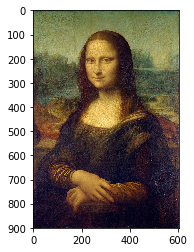

In [2]:
photo = Image.open("Mona_Lisa_by_Leonardo_da_Vinci.jpg")
photo = np.asarray(photo)

plt.imshow(photo)
plt.show()

In [3]:
sampleNum = 5000

In [4]:
training, label = [], []
rowVec = photo.shape[0]
colVec = photo.shape[1]

In [5]:
for i in range(sampleNum):
    point = []
    point.append(np.random.randint(rowVec))
    point.append(np.random.randint(colVec))
    training.append(point)
    label.append(photo[point[0],point[1]])

In [6]:
training = np.array(training)
label = np.array(label)

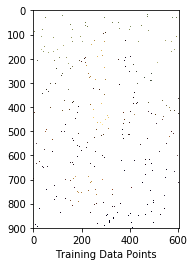

In [7]:
# Processing and Mapping R, G, B at the same time
sampleDots = np.zeros([rowVec, colVec, 3], dtype = np.uint8)
sampleDots.fill(255)
for i in range(sampleNum):
    sampleDots[training[i,0]][training[i,1]] = label[i]
    
    
plt.imshow(sampleDots)
plt.xlabel("Training Data Points")
plt.show()

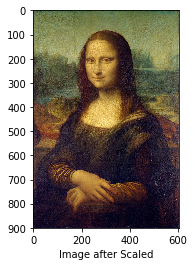

In [8]:
# 2d. Rescale from 255 to 1.
scaledImg = np.array(photo, dtype=float)

for i in range(rowVec):
    for j in range(colVec):
        scaledImg[i,j] = photo[i,j] / 255

plt.imshow(scaledImg)
plt.xlabel("Image after Scaled")
plt.show()

In [9]:
scalLabel = np.array(label, dtype=float)
scalLabel /= 255

In [10]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

def randomForest(numTree = 1, depth = None, xlabel = "Forest Image 1"):
    forest = RandomForestRegressor(random_state = 0, n_estimators = numTree, max_depth = depth)
    forest.fit(training, label)
    prediction = np.zeros([rowVec, colVec, 3])
    for i in range(rowVec):
        for j in range(colVec):
            point = [i,j]
            point = np.array(point)
            prediction[i,j] = forest.predict(point.reshape(1,-1)) / 255
            
    plt.xlabel(xlabel)
    plt.imshow(prediction)
    plt.show()
    return prediction

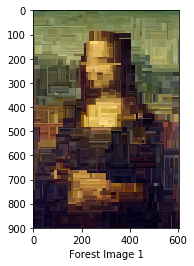

In [11]:
predictionF = randomForest()

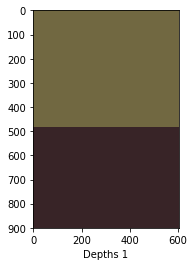

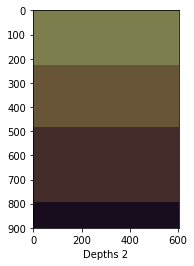

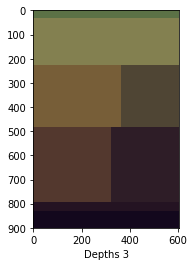

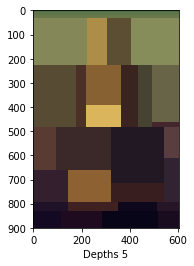

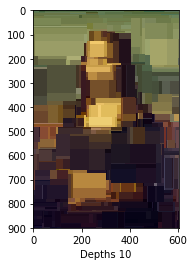

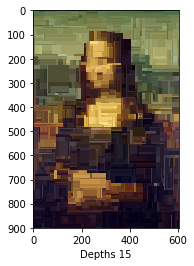

array([[[ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        ..., 
        [ 0.25490196,  0.38039216,  0.22745098],
        [ 0.25490196,  0.38039216,  0.22745098],
        [ 0.25490196,  0.38039216,  0.22745098]],

       [[ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        ..., 
        [ 0.25490196,  0.38039216,  0.22745098],
        [ 0.25490196,  0.38039216,  0.22745098],
        [ 0.25490196,  0.38039216,  0.22745098]],

       [[ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        [ 0.23529412,  0.34117647,  0.21960784],
        ..., 
        [ 0.17647059,  0.29019608,  0.17254902],
        [ 0.17647059,  0.29019608,  0.17254902],
        [ 0.17647059,  0.29019608,  0.17254902]],

       ..., 
       [[ 0.06666667,  0.05490196,  0.17647059],
        

In [12]:
# A single decision tree, but with depths 1, 2, 3, 5, 10, and 15.
randomForest(depth=1, xlabel="Depths 1")
randomForest(depth=2, xlabel="Depths 2")
randomForest(depth=3, xlabel="Depths 3")
randomForest(depth=5, xlabel="Depths 5")
randomForest(depth=10, xlabel="Depths 10")
randomForest(depth=15, xlabel="Depths 15")

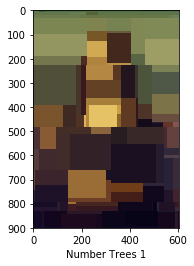

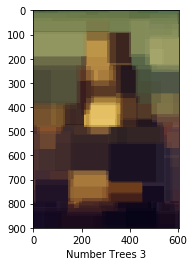

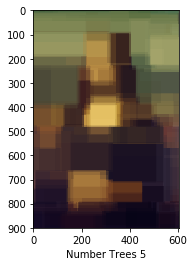

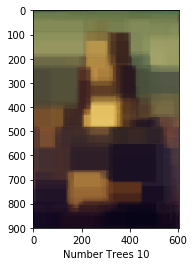

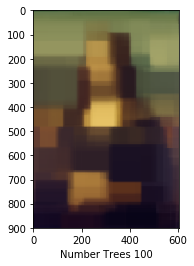

array([[[ 0.25194767,  0.36913459,  0.23879103],
        [ 0.25194767,  0.36913459,  0.23879103],
        [ 0.25194767,  0.36913459,  0.23879103],
        ..., 
        [ 0.21283943,  0.33173188,  0.20615327],
        [ 0.21283943,  0.33173188,  0.20615327],
        [ 0.21283943,  0.33173188,  0.20615327]],

       [[ 0.25009597,  0.36645212,  0.23530778],
        [ 0.25009597,  0.36645212,  0.23530778],
        [ 0.25009597,  0.36645212,  0.23530778],
        ..., 
        [ 0.21153551,  0.33162077,  0.20631667],
        [ 0.21153551,  0.33162077,  0.20631667],
        [ 0.21153551,  0.33162077,  0.20631667]],

       [[ 0.25108617,  0.36726024,  0.23526016],
        [ 0.25108617,  0.36726024,  0.23526016],
        [ 0.25108617,  0.36726024,  0.23526016],
        ..., 
        [ 0.20824974,  0.32841729,  0.20422724],
        [ 0.20824974,  0.32841729,  0.20422724],
        [ 0.20824974,  0.32841729,  0.20422724]],

       ..., 
       [[ 0.05405573,  0.03037445,  0.12078276],
        

In [13]:
# Depth 7, but with number of trees equal to 1, 3, 5, 10, and 100.
randomForest(numTree = 1, depth = 7, xlabel = "Number Trees 1")
randomForest(numTree = 3, depth = 7, xlabel = "Number Trees 3")
randomForest(numTree = 5, depth = 7, xlabel = "Number Trees 5")
randomForest(numTree = 10, depth = 7, xlabel = "Number Trees 10")
randomForest(numTree = 100, depth = 7, xlabel = "Number Trees 100")

In [14]:
# Knn
def getKnn(xlabel="Knn"):
    Knn = KNeighborsClassifier(n_neighbors = 1)
    Knn.fit(training, label)
    prediction = np.zeros([rowVec, colVec, 3])
    for i in range(rowVec):
        for j in range(colVec):
            sample = [i,j]
            sample = np.array(sample)
            prediction[i,j] = Knn.predict(sample.reshape(1,-1)) / 255
            
    plt.xlabel(xlabel)
    plt.imshow(prediction)
    plt.show()
    return prediction


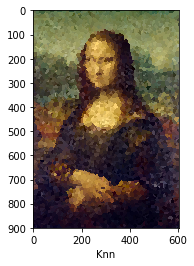

In [15]:
predictionKnn = getKnn()